# Homework 2_2
## Application: SVD and PCA for Machine Learning

### Clustering with PCA
The task for this exercise is to verify the ability of PCA in clustering data by projecting very high-dimensional datapoints to 2 or 3 dimensions. In particular, consider the dataset MNIST provided on Virtuale. This dataset contains images of handwritten digits with dimension $28 × 28$, together with a number from 0 to 9 representing the label. You are asked to:
* Load the dataset in memory and explore its head and shape to understand how the informations are placed inside of it;
* Split the dataset into the $X$ matrix of dimension $d × N$, with $d = 784$ being the dimension of each datum, $N$ is the number of datapoints, and $Y ∈ R^N$ containing the corresponding labels;
* Choose a number of digits (for example, 0, 6 and 9) and extract from $X$ and $Y$ the sub-dataset containing only the considered digits. Re-call $X$ and $Y$ those datasets, since the originals are not required anymore;
* Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from $X$ (and the cor- responding $Y$). Call them $X_{train}$ and $Y_{train}$. Everything else is the test set. Call it $X_{test}$ and $Y_{test}$
* Implement the algorithms computing the PCA of $X_{train}$ with a fixed $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster;
* Compute, for each cluster, the average distance from the centroid. Comment the result;
* Compute, for each cluster, the average distance from the centroid on the test set. Comment the results;
* Define a classification algorithm in this way: given a new observation $x$, compute the distance between $x$ and each cluster centroid. Assign $x$ to the class corresponding the the closer centroid. Compute the accuracy of this algorithm on the test set and compute its accuracy;
* Repeat this experiment for different values of $k$ and different digits. What do you observe?


##### 1. Load the dataset in memory and explore its head and shape to understand how the informations are placed inside of it

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

#_____________________________________
#Load data into memory
df = pd.read_csv('./data/data.csv')
print('Dimensions of data:', df.shape)

Dimensions of data: (42000, 785)


In [90]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 2. Split the dataset into the $X$ matrix of dimension $d × N$, with $d = 784$ being the dimension of each datum, $N$ is the number of datapoints, and $Y ∈ R^N$ containing the corresponding labels

In [91]:
data = np.array(df)                                 #convert to numpy array
Y = data[:, 0:1]
X = data[:, 1:]

X, Y = X.T, Y.T                                     #transpose to have features in rows (d dimension of datum)

print('X shape:', X.shape, ' Y shape:', Y.shape)

X shape: (784, 42000)  Y shape: (1, 42000)


##### 3. Choose a number of digits (for example, 0, 6 and 9) and extract from $X$ and $Y$ the sub-dataset containing only the considered digits. Re-call $X$ and $Y$ those datasets, since the originals are not required anymore

In [92]:
#________________________________________________________________________________________
#From the dataset (X, Y), isolate ONLY the datapoints corresponding to the digits 0, 6, 9
classes = [0, 6, 9]
def GetDatasetClasses(X, Y, classes):
    
    if len(classes) == 2:
        bool_indexes = ( (Y[0, :] == classes[0]) | (Y[0, :] == classes[1]) )
        Y = Y[:, bool_indexes]
        X = X[:, bool_indexes]
    
    elif len(classes) == 3:
        bool_indexes = ( (Y[0, :] == classes[0]) | (Y[0, :] == classes[1]) | (Y[0, :] == classes[2]) )
        Y = Y[:, bool_indexes]
        X = X[:, bool_indexes]
        
    else:
        raise ValueError('Only 2 or 3 classes are supported')
        
    return X, Y

X, Y = GetDatasetClasses(X, Y, classes)

print('X shape - d features for N samples:', X.shape, '; Y shape - 1 label for N samples:', Y.shape)

X shape - d features for N samples: (784, 12457) ; Y shape - 1 label for N samples: (1, 12457)


Visualizing random sample

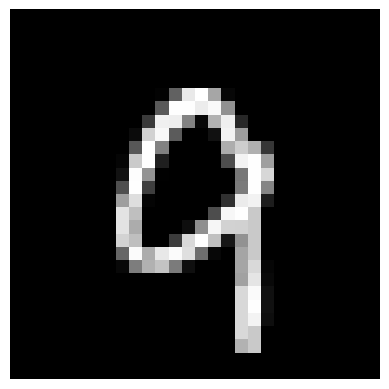

In [93]:
image = X[:, 10]
image = np.reshape( image, (28, 28) )
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

##### 4. Set $N_{train} < N$ and randomly sample a training set with $N_{train}$ datapoints from $X$ (and the cor- responding $Y$). Call them $X_{train}$ and $Y_{train}$. Everything else is the test set. Call it $X_{test}$ and $Y_{test}$ .

In [94]:
#__________________________________________________________________________
#defining function to split the dataset into train and test sets
def train_test_split(X_, Y_, N_train_):
    d, N = X_.shape                                         #d is the number of features, N is the number of samples

    indx = np.arange(0, N)                                  #define the array of indexes
    np.random.shuffle(indx)                                 #randomly shuffle the indexes
    
    indx_train = indx[:N_train_]
    indx_test = indx[N_train_:]
    
    X_train, X_test = X_[:, indx_train], X_[:, indx_test]
    
    Y_train, Y_test = Y_[:, indx_train], Y_[:, indx_test]
    
    return X_train, X_test, Y_train, Y_test
    

N_train = int(X.shape[1]*0.75)
print('Number of train samples:', N_train)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, N_train)

print('X_train shape:', X_train.shape, ' Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape, ' Y_test shape:', Y_test.shape)

Number of train samples: 9342
X_train shape: (784, 9342)  Y_train shape: (1, 9342)
X_test shape: (784, 3115)  Y_test shape: (1, 3115)


##### 5. Implement the algorithms computing the PCA of $X_{train}$ with a fixed $k$. Visualize the results (for $k = 2$) and the position of the centroid of each cluster

The implementation of PCA is as follows:

* Consider the dataset $X$
* Compute the centered version of $X$ as $X_c = X - c(X)$, subtraction between matrix and vector is done column by column
* Compute the SVD of $X_c$
* Compute the truncated SVD of $X_c$
* Compute the projected dataset $Z_k = U_k^T X_c$, where the columns of $U_k$ are called the feature vectors, while the columns of $Z$ are the principal components of $X$

In [95]:
#_______________________________________________
#returns centroid of the dataset
def Centroid(X_):
    C = np.mean( X_, axis=1, keepdims = True )          #axis=1 means along all the samples

    return np.array(C)

#________________________________________________________________________________
#centering the dataset (subtracting the centroid from each column of the dataset)
def Center(X_):
    
    CX = Centroid(X_)
    Xc = X_ - CX                                        #python automatically copies for X_.shape[1] times
    
    return Xc

#_____________________________________________________________________________________
#returns the projected dataset using PCA with k components and the centroid of X_train
def PCA(X_, k_):
    Xc = Center(X_)
    
    U, _, _ = np.linalg.svd(Xc, full_matrices = False)  #only interested in U_k

    U_k = U[:, :k_]

    Z_k = U_k.T @ Xc                                    #projecting d features onto k components
    
    return Z_k , U_k


#calling PCA function with k=2
Z_k, U_k = PCA(X_train, 2)
print('Uk shape:', U_k.shape)
print('Projected dataset Zk shape:', Z_k.shape)


Uk shape: (784, 2)
Projected dataset Zk shape: (2, 9342)


Centroid of class 0: [[-895.53136002]
 [ -39.22944566]]
Centroid of class 6: [[ 313.86990464]
 [-374.17645247]]
Centroid of class 9: [[594.8189915 ]
 [415.61274138]]


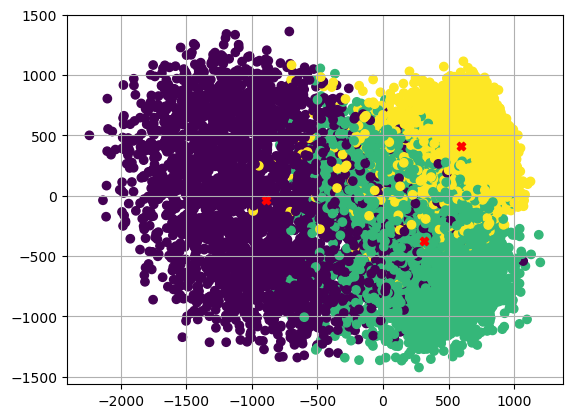

In [96]:
#____________________________________________________________________________________________
#getting the centroids of the projected dataset
def clusters_centroids(Z_k_, Y_, classes_, verbose = False):
    centroids = []
    clusters = []                                                           #returning clusters for later use
    for c in classes_:
        cluster = Z_k_[:, Y_[0, :] == c]                                    #select the datapoints corresponding to the class c, matching from the labels
        
        centroid = Centroid(cluster)
        
        if verbose:
            print(f'Centroid of class {c}: {centroid}')

        centroids.append(centroid)
        clusters.append(cluster)
        
        
    return clusters, centroids


clusters, cntrds = clusters_centroids(Z_k, Y_train, classes, verbose=True)
cntrds_array = np.array(cntrds).squeeze().T                                 #squeeze to remove the extra dimension of size 1 (converting row vector into single with all centroids) for graphing purposes
#_______________________________________________________________
#plotting the projected dataset
#plotting the two "components" of Z_k, c colors given by Y_train
plt.scatter(Z_k[0, :], Z_k[1, :], c = Y_train[0, :])
plt.scatter(cntrds_array[0, :], cntrds_array[1, :], c='red', marker='X')
plt.grid()
plt.show()


##### 6. Compute, for each cluster, the average distance from the centroid. Comment the result.

In [97]:
def clusters_average_distance(clusters_, cntrds_, verbose = False):

    average_distances = []
    for i in range(len(clusters_)):
        #calculate the distance from each point to the centroid. Features are stored in rows, so axis = 0 to make norm over each feature
        distances = np.linalg.norm(clusters_[i] - cntrds_[i], axis=0)
        if verbose:
            print(f'Distances shape (all samples): {distances.shape}')
        
        #calculate the average distance____________________
        average_distance = np.mean(distances)
        if verbose:
            print(f'Average distance: {average_distance}')
        average_distances.append(average_distance)
        
    return average_distances

#using clusters and centroids returned by clusters_centroids() function
avg_dist = clusters_average_distance(clusters, cntrds)

for i in range(len(classes)):
    print(f'Average distance of class {classes[i]} from its centroid:', avg_dist[i])

Average distance of class 0 from its centroid: 730.2163009751398
Average distance of class 6 from its centroid: 542.3674904055658
Average distance of class 9 from its centroid: 368.4647878918414


* Considerations: the average distance is bigger for the bigger clusters. From the average distance we can see that the first cluster (purple) is the bigger one. Second one is the green one and finally the yellow one has the least amount of samples

##### 7. Compute, for each cluster, the average distance from the centroid on the test set. Comment the results.


Centroid of class 0: [[-921.43668757]
 [ -42.65886135]]
Centroid of class 6: [[ 286.90644543]
 [-389.34673331]]
Centroid of class 9: [[562.100766 ]
 [405.1197223]]


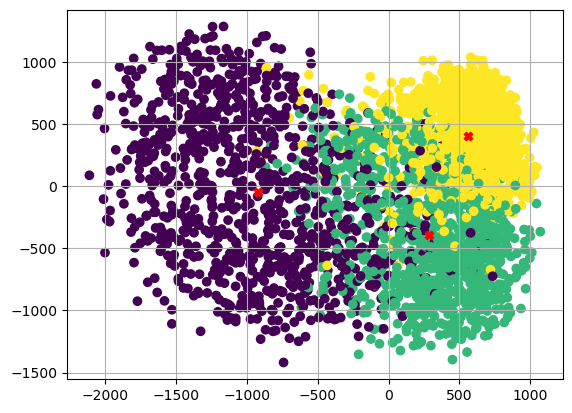



Average distance of class 0 from training set centroid: 766.1102769376881
Average distance of class 6 from training set centroid: 542.6495169240526
Average distance of class 9 from training set centroid: 361.86155055312645


In [98]:
X_test_c = Center(X_test)
Z_k_test = U_k.T @ X_test_c             #U_k is not recomputed, we use the svd of the training set to test new data not seen

test_clusters, test_centroids = clusters_centroids(Z_k_test, Y_test, classes, verbose=True)

#visualizing the test set
cntrds_array = np.array(test_centroids).squeeze().T
plt.scatter(Z_k_test[0, :], Z_k_test[1, :], c = Y_test[0, :])
plt.scatter(cntrds_array[0, :], cntrds_array[1, :], c='red', marker='X')
plt.grid()
plt.show()

avg_dist_test = clusters_average_distance(test_clusters, cntrds)

print('\n')
for i in range(len(classes)):
    print(f'Average distance of class {classes[i]} from training set centroid:', avg_dist_test[i])

##### 8. Define a classification algorithm in this way: given a new observation $x$, compute the distance between $x$ and each cluster centroid. Assign $x$ to the class corresponding the the closer centroid. Compute the accuracy of this algorithm on the test set and compute its accuracy


In [99]:
def ClassificationPCA(x_, centroids_, U_k_, classes_, verbose = False):
    x = x_                                                          #x dimension d x 1
    zk = U_k_.T @ x                                                 #zk dimension k x 1          
    
    if verbose:
        print(f'Data point shape: {x.shape}')
        print(f'Projected data point shape: {zk.shape}')
    
    distances = []
    for centroid in centroids_:
            
        dist = np.linalg.norm(zk - centroid)                        #axis=0 to make norm over each feature of a sample
        
        if verbose:
            print(f'Centroid shape: {centroid.shape}')
            print(f'Distance from centroid {centroid}: {dist}')
        
        distances.append(dist)                                      #distance of the data point from each centroid, 3 in case classes = [0, 6, 9]

    return classes_[np.argmin(distances)]                           #return class with index of the closest centroid (the number of centroids is the same as the number of classes)


In [100]:
def AccuracyPCA(X_, Y_, U_k_, centroids_, classes_):
    XC = Center(X_)
    count = 0
    predicted_labels = []
    for i in range(X_.shape[1]):
        label = ClassificationPCA(XC[:, i:i+1], centroids_, U_k_, classes_)
        predicted_labels.append( label )
        
        if label == Y_[0, i]:                                       #predicted label and true label on sample i need to be the same
            count += 1
        
    acc = count/Y_.shape[1]
    
    return acc, predicted_labels

In [101]:
acc, predicted_labels = AccuracyPCA(X_test, Y_test, U_k, cntrds, classes)
print(f'Accuracy of the classification: {round(acc,4)}')


Accuracy of the classification: 0.8343


##### 9. Repeat this experiment for different values of k and different digits. What do you observe?

In [102]:
def K_PCA(k_, X_, Y_, classes_, N_train_percent = 0.75):
    
    #selecting only the datapoints corresponding to the classes of intereset___________________
    X_, Y_ = GetDatasetClasses(X_, Y_, classes_)
    
    #declaring number of training samples______________________________________________________
    N_train = int(X_.shape[1] * N_train_percent)
    
    #splitting the dataset_____________________________________________________________________
    X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, N_train)
    
    #PCA_______________________________________________________________________________________
    Z_k_PCA, U_k_PCA = PCA(X_train, k_)
    clusters, centroids = clusters_centroids(Z_k_PCA, Y_train, classes_)
    
    #Accuracy__________________________________________________________________________________
    accuracy_train, _ = AccuracyPCA(X_train, Y_train, U_k_PCA, centroids , classes_)
    accuracy_test, _ = AccuracyPCA(X_test, Y_test, U_k_PCA, centroids, classes_)
    
    return accuracy_test


In [103]:
classes = [1, 4, 8]
KS = [3, 5, 10, 100, 500, 700]
df = pd.read_csv('./data/data.csv')
data = np.array(df) #convert to numpy array
X = data[:, 1:].T   #transpose to have d dimension of datum in rows
Y = data[:, :1].T   #labels
print('X shape:', X.shape, ' Y shape:', Y.shape)

for k in KS:
    acc = K_PCA(k, X, Y, classes)
    print(f'\nAccuracy of the classification for k = {k}: {round(acc,6)}')

X shape: (784, 42000)  Y shape: (1, 42000)

Accuracy of the classification for k = 3: 0.909828

Accuracy of the classification for k = 5: 0.929173

Accuracy of the classification for k = 10: 0.941342

Accuracy of the classification for k = 100: 0.94103

Accuracy of the classification for k = 500: 0.940406

Accuracy of the classification for k = 700: 0.941654


In [104]:
classes = [3, 4]
KS = [3, 5, 10, 100, 500, 700]
df = pd.read_csv('./data/data.csv')
data = np.array(df) #convert to numpy array
X = data[:, 1:].T   #transpose to have d dimension of datum in rows
Y = data[:, :1].T   #labels
print('X shape:', X.shape, ' Y shape:', Y.shape)

for k in KS:
    acc = K_PCA(k, X, Y, classes)
    print(f'\nAccuracy of the classification for k = {k}: {round(acc,6)}')

X shape: (784, 42000)  Y shape: (1, 42000)

Accuracy of the classification for k = 3: 0.973409

Accuracy of the classification for k = 5: 0.974834

Accuracy of the classification for k = 10: 0.976258

Accuracy of the classification for k = 100: 0.980532

Accuracy of the classification for k = 500: 0.972934

Accuracy of the classification for k = 700: 0.980532
